## Importing Source

In [2]:
import pandas as pd
# For the chart
import matplotlib.pyplot as plt
# for The Maps
#pip install folium
import geopandas as gpd
from shapely.geometry import Point
import folium
# Importing all functions
import defs


C:\Users\Lymaris\AppData\Local\Temp\ipykernel_7300\2090910359.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AviationData.csv', encoding='latin1')


### Data Cleaning

In [ ]:
data = pd.read_csv('AviationData.csv', encoding='latin1')

In [3]:
# List of tuples containing the columns and functions to be applied in order to format, clean and fill.
columms_func = [
    ('Total.Fatal.Injuries', defs.fill0),
    ('Total.Uninjured', defs.fill0),
    ('Total.Serious.Injuries', defs.fill0),
    ('Total.Minor.Injuries', defs.fill0),
    ('Weather.Condition', lambda x: defs.fillstr(x, "UNK")),
    ('Event.Date', defs.tpdate),
    ('Total.Fatal.Injuries', defs.tpint),
    ('Total.Serious.Injuries', defs.tpint),
    ('Total.Minor.Injuries', defs.tpint),
    ('Total.Uninjured', defs.tpint)
]

# Applying the functions to the DataFrame columns
for columms, func in columms_func:
    data[columms] = func(data[columms])

# Replace to standardize
data['Injury.Severity'] = data['Injury.Severity'].str.replace("\((\d{1,5})\)", "", regex=True)
data['Weather.Condition'] = data['Weather.Condition'].replace('Unk', 'UNK')


In [4]:
# dropping irrelevant columns for the analysis
drop_columns = [ 'Airport.Code','Airport.Name', 'Aircraft.damage','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status',
       'Publication.Date']
data.drop(drop_columns, axis=1, inplace=True)

In [5]:
# Validating the cleaning process
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Injury.Severity         87889 non-null  object        
 9   Aircraft.Category       32287 non-null  object        
 10  Registration.Number     87507 non-null  object        
 11  Make                    88826 non-null  object        
 12  Model                   88797 non-null  object

## Hypothesis 1

 **Temporal Trend Hypothesis:** "Aviation safety has improved over time, reflected by a decrease in the frequency of aircraft accidents."

### Filter accidents by decade

In [6]:
# Filter accidents by decade
Filter_10_df = defs.filter_accidents_by_decade(data)

# Display the new DataFrame
display(Filter_10_df)


,start_year,end_year,total_of_accidents
0,1948,1958,1
1,1958,1968,1
2,1968,1978,2
3,1978,1988,19413
4,1988,1998,23823
5,1998,2008,20673
6,2008,2018,17127
7,2018,2022,6242


In [186]:
# Salving the report
Filter_10_df.to_csv('Filter_10_df.csv', index=True)

### Creating the chart


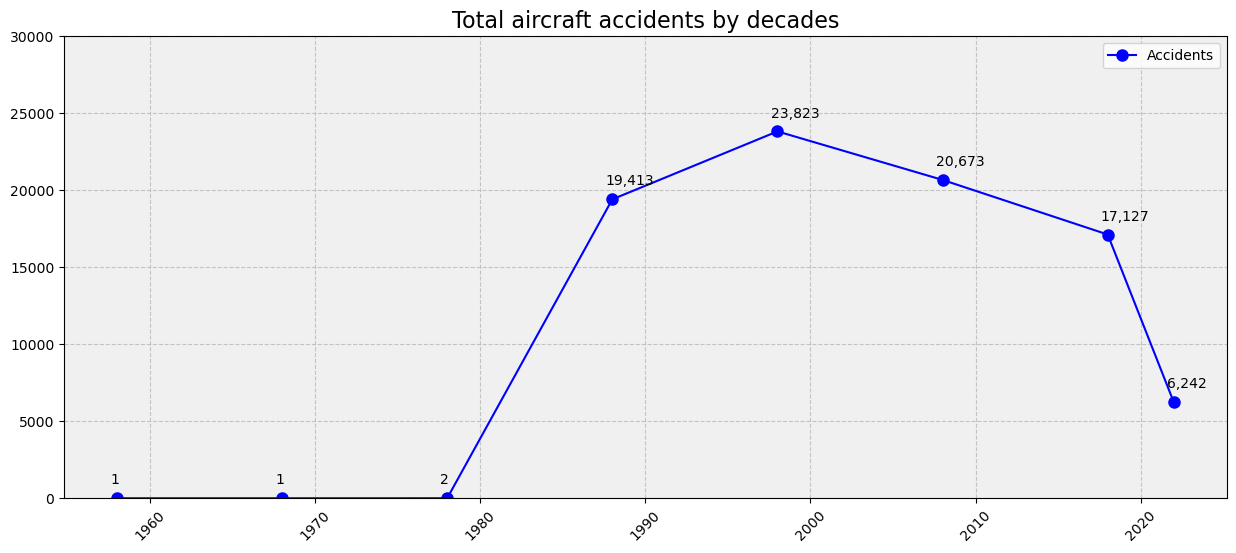

In [32]:


# Sort the DataFrame by date, if needed
Filter_10_df.sort_values(by='end_year', inplace=True)

# Plot the line plot using pandas with customizations
ax = Filter_10_df.plot(x='end_year', y='total_of_accidents', kind='line', figsize=(15, 6), color='blue', linestyle='-', marker='o', markersize=8)

# Add labels and title
ax.set_xlabel('', fontsize=12)
# ax.set_ylabel('Total of Accidents', fontsize=12)
ax.set_title('Total aircraft accidents by decades', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the plot background color
ax.set_facecolor('#f0f0f0')

# Customize the legend
ax.legend(['Accidents'], loc='upper right', fontsize=10)

ax.set_ylim(0, 30000)


# Add values to each marker
for i, txt in enumerate(Filter_10_df['total_of_accidents']):
    ax.annotate('{:,}'.format(Filter_10_df['total_of_accidents'].iloc[i]), 
                (Filter_10_df['end_year'].iloc[i], Filter_10_df['total_of_accidents'].iloc[i]), 
                textcoords="offset points", xytext=(-5,10), ha='left')

# Show the plot
plt.show()


### The analysis results, here are some insights:



**Result of Hypothesis:** A decreasing trend in the number of accidents over time, with a peak in 1988-1998 followed by a subsequent decline. This suggests that aviation safety may have indeed improved over the decades.

**Turning Point:** From 1988-1998, there was a significant increase in the number of accidents, followed by a decrease in the following years. This may indicate a turning point in aviation safety, where issues were identified, or measures were implemented that eventually led to a reduction in accidents.

**Continuous Evolution:** Although there is an overall decreasing trend, the number of accidents is still significant in the most recent years (2018-2022). This suggests that despite improvements over time, there is still room for continuous evolution in aviation safety.

**Need for Monitoring:** The analysis highlights the ongoing importance of monitoring and analyzing aviation safety data over time. This can help identify emerging trends, areas of concern, and opportunities for intervention and continuous improvement.


**List some protocols Findings**
1. Chicago Convention (1944): Established ICAO and international aviation regulations. It has been revised in 1959, 1963, 1969, 1975, 1980, 1997, 2000, and 2006.
2. ICAO Safety Audit Program (USOAP): Conducts safety audits on member states.
3. ICAO Standards and Recommended Practices (SARPs): Provides guidance for international aviation safety.
4. Flight Safety Assessment Program (IASA): Assesses aviation safety standards in other countries.

**Future Analysis:**
- Conduct in-depth investigations into specific factors contributing to the peak in accidents during 1988-1998. This could involve examining specific events, changes in aviation regulations, technological advancements, or external factors such as economic or political conditions.
- Implement targeted interventions based on identified trends to further improve aviation safety.

**Recommendation**
- Continue monitoring and analyzing aviation safety data to stay abreast of emerging trends and address potential safety concerns proactively.


## Hypothesis 2
**Location Hypothesis:** "Certain geographic regions have a higher incidence of aviation accidents due to factors such as population density, geographical conditions, or specific climatic characteristics."

In [65]:
# How many accidents happened from 1954 to 2022 per country -  Top 20
display(datadb['Country'].value_counts().head(20))

Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Colombia            193
South Africa        129
Japan               126
Venezuela           121
Italy               114
Argentina           112
Indonesia           110
India                96
Peru                 93
Russia               91
Name: count, dtype: int64

### MAPS

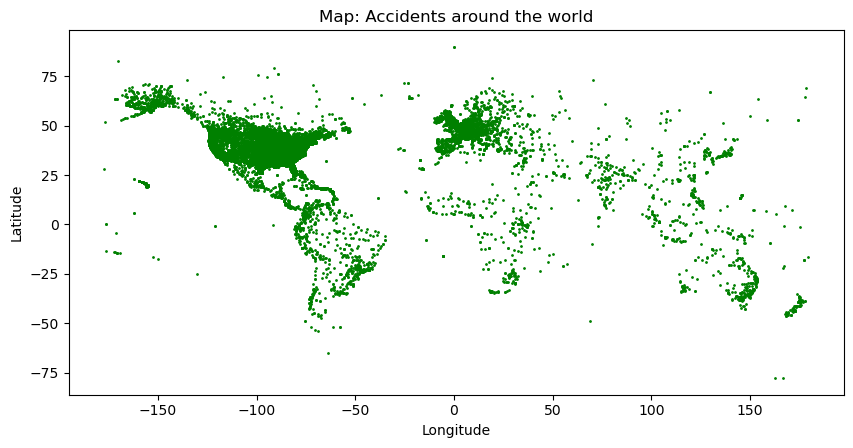

In [61]:
# Carregar os dados do CSV
dados_cidades = pd.read_csv('maps.csv')

# Criar uma coluna 'geometry' com objetos Point
dados_cidades['geometry'] = [Point(x, y) for x, y in zip(dados_cidades['Longitude'], dados_cidades['Latitude'])]

# Converter para um GeoDataFrame
dados_cidades = gpd.GeoDataFrame(dados_cidades, geometry='geometry')


# Plotar as cidades em um mapa
dados_cidades.plot(figsize=(10, 10), color='green', markersize=1)
plt.title('Map: Accidents around the world')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [62]:
# reading coordinates
geomap = pd.read_csv('maps.csv')
geomap = geomap.sample(1000) # due to high memory consumption we only use 1000 random events
geomap.reset_index(inplace=True)

# Creating a map
m = folium.Map(location=[38, -97], zoom_start=4)  # US central coordinates

# Add markers for each location
for i in range(len(geomap['City'])):
    city = geomap['City'][i]
    latitude = geomap['Latitude'][i]
    longitude = geomap['Longitude'][i]
    folium.Marker(location=[latitude, longitude], popup=city).add_to(m)



In [63]:
# show map
m

### The analysis results, here are some insights:


**Result of Hypothesis:** The United States has by far the highest incidence of aviation accidents compared to other countries listed. This could support the idea that certain geographic regions, such as highly populated areas or regions with specific climatic conditions, are more prone to aviation accidents.
    
**Identification of High-Risk Regions:** Countries like Brazil, Canada, Mexico, and the United Kingdom also have relatively high numbers of aviation accidents compared to others on the list. This suggests that these regions may indeed have factors contributing to a higher incidence of accidents, as proposed by the hypothesis.


**Further Analysis**

It would be beneficial to conduct further analysis to identify specific factors contributing to the high incidence of accidents in these regions. This could involve examining population density, geographical features, weather patterns, air traffic volume, infrastructure, and regulatory factors.    

**Conclusions**

- **Air Traffic Density:** The United States has one of the busiest and most complex airspaces in the world, with a dense network of airports, airways, and airspace sectors. High levels of air traffic can increase the risk of mid-air collisions, runway incursions, and other aviation incidents, especially in congested airspace around major cities and airports.

- **Urbanization and Population Centers:** The US is home to several major metropolitan areas, including New York, Los Angeles, Chicago, and Atlanta, which have large populations and extensive aviation infrastructure. Urbanization and population density can contribute to increased air traffic volume, airspace congestion, and the proximity of airports to residential areas, all of which may impact aviation safety.

## Hypothesis 3
**Weather Factors Hypothesis:** "Aviation accidents are more common during adverse weather conditions, such as fog, storms, or strong winds."

In [8]:
# Creating a copy from original dataframe
datadb = data.copy()

In [16]:
# How many accidents happened from 1954 to 2022 per country -  Top 20
display(datadb['Country'].value_counts().head(20))

Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Colombia            193
South Africa        129
Japan               126
Venezuela           121
Italy               114
Argentina           112
Indonesia           110
India                96
Peru                 93
Russia               91
Name: count, dtype: int64

In [55]:
# How many accidents happened from 1954 to 2022 per country -  Top 20
display(datadb['Country'].value_counts().head(20))

Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Colombia            193
South Africa        129
Japan               126
Venezuela           121
Italy               114
Argentina           112
Indonesia           110
India                96
Peru                 93
Russia               91
Name: count, dtype: int64

In [24]:
# Get the top countries,
countries_top_20_list = (datadb['Country']
                        .value_counts()
                        .head(20) # due to high memory consumption we only use 20 first countries
                        .index
                        .to_list()            
                        ) # result is a list

# filter the data, count weather conditions by country,
# rename columns, and display the resulting DataFrame
countries_top_20 = (datadb.query('Country in @countries_top_20_list')
                    .groupby('Country')['Weather.Condition']
                    .value_counts()
                    .unstack(fill_value=0)
                    .rename(columns={'IMC': 'Poor Visibility', 'UNK': 'Unknown', 'VMC': 'Good Visibility'})
                    ) # the result is dataframe



In [ ]:
# 'United States' outlier now 1%
# import numpy as np

# target_country = 'United States'

# # # Função para amostrar 1% das linhas
# # def sample_10_percent(group):
# #     return group.sample(frac=0.1, random_state=1)

# # Filtrar o DataFrame para obter todas as linhas do país específico
# country_df = datadb[datadb['Country'] == target_country]

# # Amostrar 1% das linhas para cada ano
# sampled_country_df = country_df.groupby(country_df['Event.Date'].dt.year).apply(lambda x: x.sample(frac=0.01, random_state=1)).reset_index(drop=True)

# # Obter o restante do DataFrame (excluindo o país específico)
# remaining_df = datadb[datadb['Country'] != target_country]

# # Combinar os DataFrames
# result_df1 = pd.concat([remaining_df, sampled_country_df]).reset_index(drop=True)


# result_df1['Country'].value_counts().head(20)
# # Get the top countries,
# countries_top_20_list = (result_df1['Country']
#                         .value_counts()
#                         .head(20) # due to high memory consumption we only use 20 first countries
#                         .index
#                         .to_list()            
#                         ) # result is a list

# # filter the data, count weather conditions by country,
# # rename columns, and display the resulting DataFrame
# countries_top_20 = (result_df1.query('Country in @countries_top_20_list')
#                     .groupby('Country')['Weather.Condition']
#                     .value_counts()
#                     .unstack(fill_value=0)
#                     .rename(columns={'IMC': 'Poor Visibility', 'UNK': 'Unknown', 'VMC': 'Good Visibility'})
#                     ) # the result is dataframe

In [62]:
# heatmap
# countries_top_20.style.background_gradient(cmap='Blues', vmin=1, vmax=190, axis=0).set_properties(**{'font-weight': 'bold'})


Weather.Condition,Poor Visibility,Unknown,Good Visibility
Country,,,
Argentina,12,67,33
Australia,6,235,59
Bahamas,9,31,176
Brazil,18,293,63
Canada,30,243,86
Colombia,14,110,69
France,16,173,47
Germany,11,148,56
India,3,90,3


In [ ]:
# heatmap
countries_top_20.style.background_gradient(cmap='Blues', vmin=1, vmax=190, axis=0).set_properties(**{'font-weight': 'bold'})


Weather.Condition,Poor Visibility,Unknown,Good Visibility
Country,,,
Argentina,12,67,33
Australia,6,235,59
Bahamas,9,31,176
Brazil,18,293,63
Canada,30,243,86
Colombia,14,110,69
France,16,173,47
Germany,11,148,56
India,3,90,3


In [64]:
# Salving the report
countries_top_20.to_csv('countries_top_20.csv', index=True)

### The analysis results, here are some insights:

**Result of Hypothesis:** The fact that accident numbers differ in various weather conditions across countries implies that factors such as weather patterns, air infrastructure, and proficiency in managing adverse weather conditions contribute to these disparities.

**Number of Accidents by Country:**

The United States leads in the absolute number of accidents, suggesting influences beyond weather.
Brazil, Canada, and Mexico also record a considerable number of accidents, albeit on a smaller scale compared to the United States.

**Distribution of Accidents according to Weather Conditions:**

Countries like Argentina, Brazil, Mexico, and Venezuela have more accidents in adverse weather conditions.
In contrast, India and Japan report fewer accidents, especially in good visibility conditions.

**Variation in Accident Distribution across Various Weather Conditions:**

India and Spain exhibit a more balanced distribution of accidents across different weather conditions, suggesting more effective risk management in adverse conditions.


**Regional Variances:**

The number of accidents in different visibility conditions varies from country to country. This may be due to differences in weather patterns, air transportation infrastructure, and the ability to deal with challenging weather conditions in each location.

* Recommendations and Further analysis:

    * **Correlation between Weather and Accidents:**    Poor weather conditions may lead to more air accidents and technologies to handle these hazardous situations.

    * **Additional Safety Measures:**
    Countries with high accident rates in adverse weather should consider enhancing safety protocols. This includes improving navigation systems and pilot training.

    * **International Collaboration:**
    Global cooperation is vital in aviation safety. Sharing best practices and data can enhance safety standards worldwide.